# Parte 2

# Importamos las librerias

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from pandas import read_csv
from pycaret.classification import setup
from pycaret.classification import compare_models

## Cargamos la data y la separamos en Train y Test

In [2]:
X=np.load('X_MNIST_60_mil.npy', allow_pickle=True)
Y=np.load('y_MNIST_60_mil.npy', allow_pickle=True)
Xfinal=np.load('X_MNIST_10_mil.npy', allow_pickle=True)

In [3]:
train_imagen, test_imagen, train_numero, test_numero = train_test_split(X, Y, test_size=0.30, random_state=123)

### Muestro el tamaño

In [4]:
print(train_imagen.shape)
print(test_imagen.shape)
print(train_numero.shape)
print(test_imagen.shape)

(42000, 784)
(18000, 784)
(42000,)
(18000, 784)


## Por observacion visual, se quitaran los primeros 5 pixeles de cada lado 

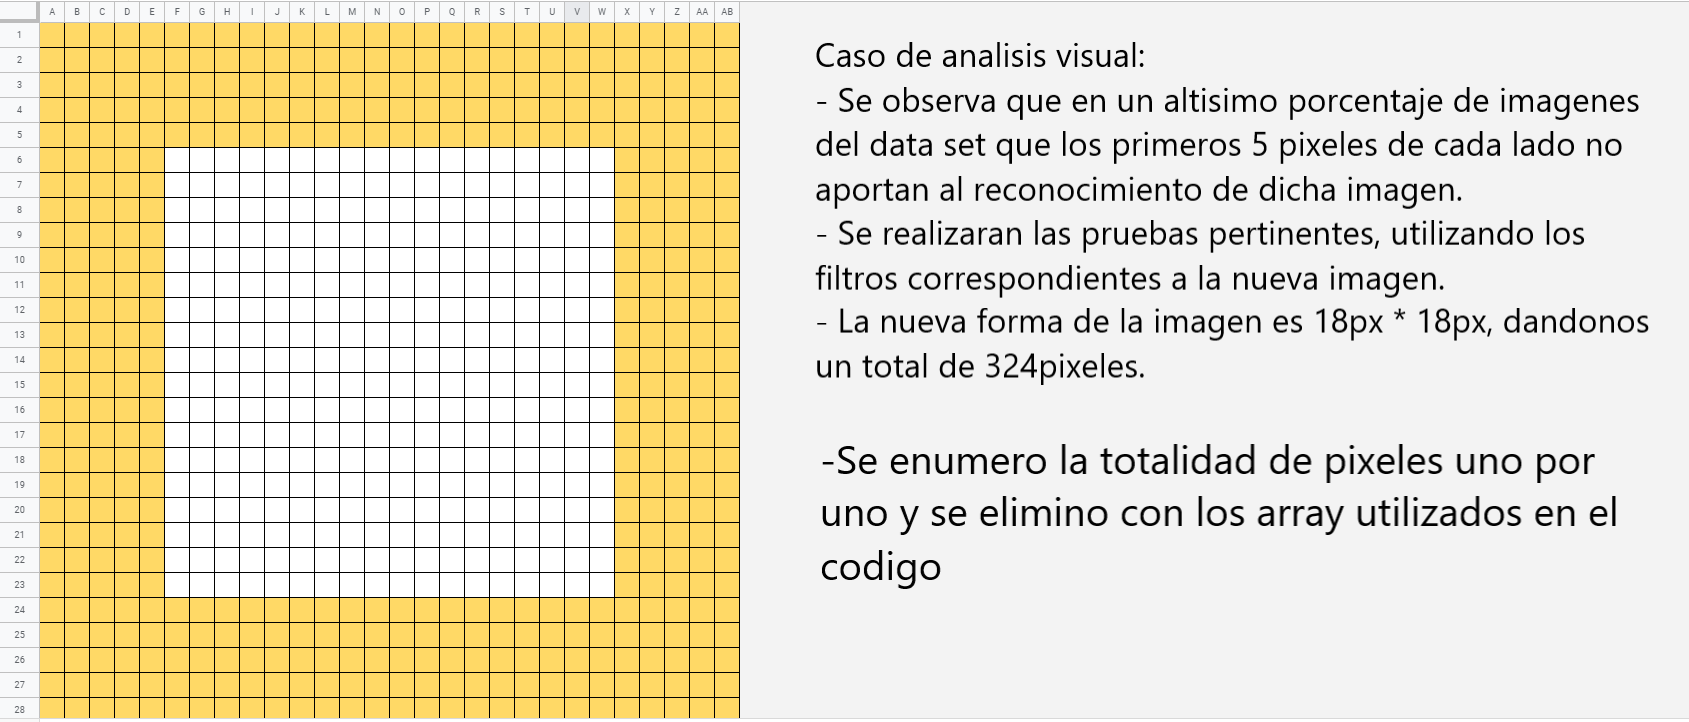

In [3]:
from IPython.display import Image
Image("ExplicacionReduccion.png")

In [5]:
xtr= train_imagen
xte= test_imagen

In [6]:
ytr= train_numero
yte= test_numero

In [7]:
dftr= pd.DataFrame(xtr)
dfte= pd.DataFrame(xte)

In [8]:
dftr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,95.0,147.0,235.0,244.0,147.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,84.0,185.0,240.0,254.0,254.0,254.0,222.0,254.0,254.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,181.0,243.0,149.0,140.0,101.0,32.0,32.0,32.0,19.0,92.0,254.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,190.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,222.0,254.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.0,217.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,251.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,129.0,247.0,199.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,71.0,0.0,0.0,0.0,0.0,31.0,80.0,73.0,244.0,247.0,180.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.0,242.0,144.0,71.0,71.0,154.0,248.0,254.0,198.0,128.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,146.0,227.0,254.0,254.0,171.0,93.0,38.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [9]:
dfte

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,194.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,191.0,29.0,0.0,0.0,77.0,253.0,127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,211.0,253.0,103.0,0.0,3.0,186.0,253.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,253.0,232.0,11.0,0.0,31.0,253.0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,253.0,240.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161.0,254.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,220.0,253.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,253.0,253.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,253.0,214.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0,250.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,

In [10]:
sup=list(range(0, 141, 1))
inf=list(range(640, 784, 1))
lat=list(range(141, 640, 1))

In [11]:
lat=[141, 142, 143, 144, 145, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 388, 389, 390, 391, 392,
 393, 394, 395, 396, 397, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621]

In [12]:
dftr.drop(sup, axis=1, inplace=True)
dftr.drop(inf, axis=1, inplace=True)
dftr.drop(lat, axis=1, inplace=True)
dfte.drop(sup, axis=1, inplace=True)
dfte.drop(inf, axis=1, inplace=True)
dfte.drop(lat, axis=1, inplace=True)

In [13]:
dftr

,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,95.0,147.0,235.0,244.0,147.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,84.0,185.0,240.0,254.0,254.0,254.0,222.0,254.0,254.0,84.0,0.0,0.0,0.0,0.0,0.0,5.0,181.0,243.0,149.0,140.0,101.0,32.0,32.0,32.0,19.0,92.0,254.0,112.0,0.0,0.0,0.0,0.0,0.0,10.0,190.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,222.0,254.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,220.0,254.0,142.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,197.0,253.0,141.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,222.0,254.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,226.0,254.0,142.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,110.0,241.0,254.0,182.0,88.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,254.0,254.0,254.0,254.0,254.0,206.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,250.0,254.0,181.0,153.0,80.0,197.0,254.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,170.0,55.0,4.0,0.0,0.0,6.0,143.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0,204.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0,229.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.0,217.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,251.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,129.0,247.0,199.0,67.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,31.0,80.0,73.0,244.0,247.0,180.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,201.0,130.0,83.0,127.0,232.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,241.0,253.0,253.0,253.0,253.0,247.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,221.0,254.0,253.0,253.0,253.0,253.0,212.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,253.0,254.0,154.0,220.0,253.0,253.0,226.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,253.0,254.0,45.0,11.0,113.0,253.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,254.0,255.0,54.0,0.0,54.0,254.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,253.0,254.0,172.0,12.0,212.0,253.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,230.0,254.0,253.0,174.0,237.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,254.0,253.0,253.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,253.0,253.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,184.0,255.0,254.0,254.0,209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,212.0,253.0,172.0,155.0,253.0,219.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,196.0,250.0,194.0,49.0,61.0,252.0,253.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,190.0,250.0,106.0,0.0,0.0,0.0,239.0,245.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223.0,253.0,128.0,0.0,0.0,0.0,58.0,24

In [14]:
artr=dftr.to_numpy()
arte=dfte.to_numpy()

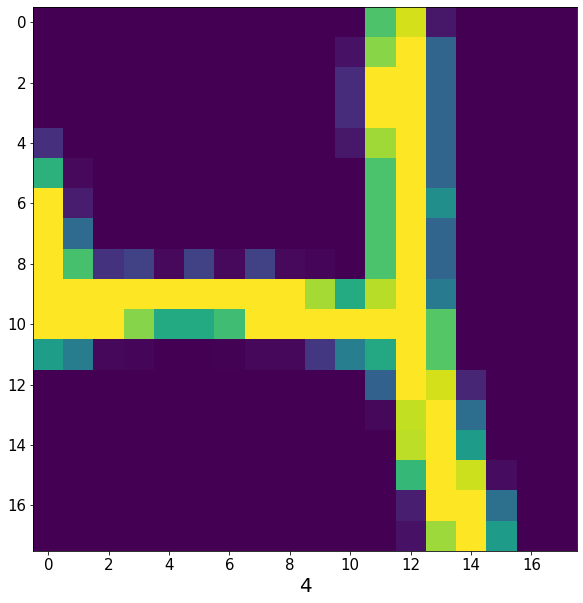

In [15]:
nn = 1
for i, num in enumerate([random.randint(1, artr.shape[0]) for _ in range(nn)]):
    plt.figure(figsize=(10,10))
    plt.subplot(1, nn, i+1)
    plt.xlabel(ytr[num],fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.imshow(artr[num].reshape(18,18))

In [16]:
dftr['nombre']=ytr

In [17]:
dfte['nombre']=yte

In [18]:
dftr

,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,nombre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,95.0,147.0,235.0,244.0,147.0,57.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,84.0,185.0,240.0,254.0,254.0,254.0,222.0,254.0,254.0,84.0,0.0,0.0,0.0,0.0,0.0,5.0,181.0,243.0,149.0,140.0,101.0,32.0,32.0,32.0,19.0,92.0,254.0,112.0,0.0,0.0,0.0,0.0,0.0,10.0,190.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,222.0,254.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,220.0,254.0,142.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,197.0,253.0,141.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,222.0,254.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,226.0,254.0,142.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,110.0,241.0,254.0,182.0,88.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,254.0,254.0,254.0,254.0,254.0,206.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,250.0,254.0,181.0,153.0,80.0,197.0,254.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,170.0,55.0,4.0,0.0,0.0,6.0,143.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0,204.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0,229.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.0,217.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,251.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,129.0,247.0,199.0,67.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,31.0,80.0,73.0,244.0,247.0,180.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.0,201.0,130.0,83.0,127.0,232.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,241.0,253.0,253.0,253.0,253.0,247.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,221.0,254.0,253.0,253.0,253.0,253.0,212.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.0,253.0,254.0,154.0,220.0,253.0,253.0,226.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,253.0,254.0,45.0,11.0,113.0,253.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.0,254.0,255.0,54.0,0.0,54.0,254.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,253.0,254.0,172.0,12.0,212.0,253.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,230.0,254.0,253.0,174.0,237.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,254.0,253.0,253.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,253.0,253.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,184.0,255.0,254.0,254.0,209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,212.0,253.0,172.0,155.0,253.0,219.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,196.0,250.0,194.0,49.0,61.0,252.0,253.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,190.0,250.0,106.0,0.0,0.0,0.0,239.0,245.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,223.0,253.0,128.0,0.0,0.0,0.

In [19]:
dfte

,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,nombre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,194.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,191.0,29.0,0.0,0.0,77.0,253.0,127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,211.0,253.0,103.0,0.0,3.0,186.0,253.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105.0,253.0,232.0,11.0,0.0,31.0,253.0,232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,227.0,253.0,117.0,0.0,0.0,146.0,253.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0,254.0,209.0,0.0,0.0,0.0,228.0,251.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,253.0,249.0,58.0,0.0,0.0,49.0,252.0,194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,222.0,253.0,159.0,0.0,0.0,0.0,149.0,253.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.0,254.0,237.0,29.0,0.0,0.0,3.0,213.0,252.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,228.0,254.0,203.0,133.0,137.0,200.0,212.0,253.0,248.0,140.0,67.0,18.0,0.0,0.0,0.0,0.0,0.0,81.0,254.0,255.0,254.0,254.0,254.0,254.0,255.0,254.0,254.0,254.0,254.0,240.0,10.0,0.0,0.0,0.0,0.0,8.0,132.0,146.0,146.0,139.0,80.0,108.0,254.0,253.0,91.0,13.0,13.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,254.0,221.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,207.0,254.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,253.0,240.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161.0,254.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,220.0,253.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,253.0,253.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,173.0,253.0,254.0,253.0,152.0,152.0,152.0,152.0,214.0,253.0,152.0,152.0,41.0,0.0,0.0,0.0,0.0,203.0,253.0,252.0,253.0,252.0,253.0,252.0,253.0,252.0,253.0,252.0,253.0,252.0,203.0,0.0,0.0,0.0,0.0,183.0,142.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,234.0,253.0,203.0,0.0,0.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233.0,252.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,254.0,253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,253.0,252.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,254.0,131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,223.0,253.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,253.0,244.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.0,252.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,214.0,253.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,142.0,253.0,212.0,0.0,0.0,

In [20]:
tri = artr.astype('float32') / 255
tei = arte.astype('float32') / 255

# Aplicamos los filtros para terminar la reduccion

## Utilizo ambos contra el dataset de train, para luego quedarme con el mejor en el test

In [21]:
from sklearn.feature_selection import f_classif, mutual_info_classif
f = f_classif(tri, ytr)[0]
mi = mutual_info_classif(tri, ytr)

In [22]:
f

array([ 196.03596,  365.57706,  605.9903 ,  892.61633, 1212.9296 ,
       1457.8002 , 1607.5935 , 1748.5841 , 1905.8177 , 1959.9475 ,
       1724.5806 , 1282.4489 ,  820.8296 ,  522.6166 ,  371.59726,
        349.98618,  389.29672,  395.2621 ,  312.58896,  515.5468 ,
        761.5124 ,  951.27356, 1096.1378 , 1199.833  , 1260.0352 ,
       1331.7698 , 1484.8212 , 1611.4655 , 1497.7341 , 1277.7643 ,
       1038.8708 ,  827.5803 ,  689.4116 ,  614.2411 ,  633.22363,
        685.29517,  346.51675,  446.15775,  499.0133 ,  521.62964,
        533.6754 ,  590.6226 ,  666.94965,  713.13544,  803.49585,
        890.2484 ,  854.84155,  797.28503,  806.20685,  809.3151 ,
        765.1026 ,  681.94324,  635.40155,  705.06555,  429.82947,
        473.59146,  475.3202 ,  526.06573,  718.44257, 1016.7744 ,
       1169.1683 ,  950.7515 ,  812.6726 ,  875.45483,  871.60974,
        844.9496 ,  885.4973 ,  961.4563 ,  939.68713,  799.4141 ,
        644.33026,  571.70764,  522.6126 ,  564.9655 ,  666.44

In [23]:
mi

array([0.02564937, 0.04449841, 0.06731911, 0.09674228, 0.12457345,
       0.1572512 , 0.17926153, 0.20369673, 0.21951621, 0.22936467,
       0.21770087, 0.1779002 , 0.14000426, 0.0955928 , 0.07297331,
       0.05694542, 0.04413491, 0.04352216, 0.03488372, 0.05491489,
       0.07928472, 0.0957654 , 0.12578333, 0.14215234, 0.15170776,
       0.16499297, 0.18002862, 0.18392628, 0.17186798, 0.15583559,
       0.1280388 , 0.10818944, 0.09762329, 0.08051235, 0.07057326,
       0.06400027, 0.04138387, 0.05629536, 0.08097352, 0.08498895,
       0.09404567, 0.10394969, 0.10450443, 0.10448413, 0.12418434,
       0.12182838, 0.11850491, 0.10849118, 0.11776603, 0.11948991,
       0.11821369, 0.10572759, 0.08282115, 0.07368   , 0.04878939,
       0.0587056 , 0.07538453, 0.10101463, 0.12160053, 0.14865235,
       0.14983648, 0.12155358, 0.10853436, 0.1168784 , 0.1197493 ,
       0.11695615, 0.12550988, 0.13076305, 0.13352353, 0.10544565,
       0.08507341, 0.07717681, 0.05451526, 0.06605325, 0.09764

### Selecciono los 200 mejores resultados

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

selector1 = SelectKBest(score_func=f_classif, k=201)
selector2 = SelectKBest(score_func=mutual_info_classif, k=201)

selector1.fit(dftr, dftr['nombre'])
selector2.fit(dftr, dftr['nombre'])

SelectKBest(k=201,
            score_func=<function mutual_info_classif at 0x000001A2E9530820>)

In [25]:
vector_names1 = list(dftr.columns[selector1.get_support(indices=True)])
vector_names2 = list(dftr.columns[selector2.get_support(indices=True)])

In [26]:
vector_names1

[150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 235,
 236,
 237,
 243,
 244,
 261,
 262,
 263,
 264,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 289,
 290,
 291,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 316,
 317,
 318,
 319,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 357,
 358,
 359,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 385,
 386,
 387,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 412,
 413,
 414,
 415,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 440,
 441,
 442,
 443,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 467,
 468,
 469,
 470,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 495,
 496,
 497,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 522,
 523,
 524,
 525,
 538

In [27]:
vector_names2

[150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 210,
 211,
 235,
 236,
 241,
 242,
 243,
 244,
 261,
 262,
 263,
 264,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 289,
 290,
 291,
 292,
 295,
 297,
 298,
 299,
 300,
 301,
 316,
 317,
 318,
 319,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 385,
 386,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 412,
 413,
 414,
 426,
 427,
 428,
 429,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 522,
 523,
 524,
 525,
 538

### Los guardo en datasets, recortando los anteriormente trabajados

In [28]:
dataset1=dftr.loc[:, vector_names1]
dataset2=dftr.loc[:, vector_names2]

In [29]:
dataset1

,150,151,152,153,154,155,156,157,177,178,179,180,181,182,183,184,185,186,235,236,237,243,244,261,262,263,264,267,268,269,270,271,272,273,289,290,291,295,296,297,298,299,300,301,302,316,317,318,319,322,323,324,325,326,327,328,329,330,331,343,344,345,346,347,348,349,350,351,352,353,354,357,358,359,371,372,373,374,375,376,377,378,379,380,381,382,385,386,387,398,399,400,401,402,403,404,405,406,407,408,409,410,412,413,414,415,426,427,428,429,430,431,432,433,434,435,436,437,438,440,441,442,443,454,455,456,457,458,459,460,461,462,463,464,465,467,468,469,470,482,483,484,485,486,487,488,489,490,491,492,495,496,497,510,511,512,513,514,515,516,517,518,522,523,524,525,538,539,540,541,542,543,544,545,549,550,551,552,566,567,568,569,570,571,572,577,578,579,594,595,596,597,598,599,623,624,625,626,627,628,nombre
0,0.0,0.0,0.0,31.0,95.0,147.0,235.0,244.0,0.0,59.0,84.0,185.0,240.0,254.0,254.0,254.0,222.0,254.0,0.0,0.0,0.0,254.0,5.0,0.0,0.0,0.0,0.0,0.0,32.0,220.0,254.0,142.0,2.0,0.0,0.0,0.0,0.0,8.0,197.0,253.0,141.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,222.0,254.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,226.0,254.0,142.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,110.0,241.0,254.0,182.0,88.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,254.0,254.0,254.0,254.0,254.0,206.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,250.0,254.0,181.0,153.0,80.0,197.0,254.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,170.0,55.0,4.0,0.0,0.0,6.0,143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.0,217.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,80.0,3
1,0.0,0.0,0.0,0.0,106.0,201.0,130.0,83.0,0.0,0.0,0.0,0.0,102.0,241.0,253.0,253.0,253.0,253.0,0.0,81.0,253.0,226.0,41.0,0.0,0.0,0.0,120.0,45.0,11.0,113.0,253.0,149.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,54.0,254.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,172.0,12.0,212.0,253.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,230.0,254.0,253.0,174.0,237.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,254.0,253.0,253.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,253.0,253.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,184.0,255.0,254.0,254.0,209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,212.0,253.0,172.0,155.0,253.0,219.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,196.0,250.0,194.0,49.0,61.0,252.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,190.0,250.0,106.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,223.0,253.0,128.0,0.0,0.0,208.0,0.0,0.0,0.0,0.0,0.0,180.0,255.0,229.0,9.0,0.0,57.0,0.0,0.0,0.0,77.0,248.0,254.0,153.0,0.0,190.0,253.0,254.0,140.0,168.0,241.0,8
2,253.0,253.0,253.0,253.0,253.0,253.0,219.0,98.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,52.0,99.0,31.0,0.0,37.0,0.0,36.0,0.0,0.0,0.0,11.0,207.0,253.0,253.0,37.0,0.0,0.0,0.0,0.0,0.0,90.0,253.0,253.0,238.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,253.0,253.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,236.0,253.0,253.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,235.0,253.0,253.0,233.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,170.0,253.0,253.0,233.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,96.0,236.0,253.0,253.0,253.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,107.0,253.0,253.0,253.0,253.0,158.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,168.0,253.0,253.0,253.0,253.0,159.0,11.0,0.0,0.0,0.0,0.0,94.0,163.0,238.0,253.0,253.0,253.0,235.0,133.0,10.0,0.0,0.0,37.0,206.0,253.0,253.0,253.0,253.0,253.0,253.0,162.0,100.0,100.0,100.0,100.0,220.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,198.0,253.0,253.0,12.0,12.0,6.0,91.0,135.0,158.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,104.0,225.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,238.0,235.0,235.0,252.0,253.0,253.0,253.0,253.0,253.0,105.0,18.0,0.0,0.0,230.0,253.0,253.0,5.0,253.0,253.0,253.0,246.0,0.0,0.0,0.0,0.0,13.0,233.0,253.0,253.0,5.0,0.0

In [30]:
dataset2

,150,151,152,153,154,155,156,157,158,179,180,181,182,183,184,185,186,210,211,235,236,241,242,243,244,261,262,263,264,267,268,269,270,271,272,273,289,290,291,292,295,297,298,299,300,301,316,317,318,319,322,323,324,325,326,327,328,329,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,371,372,373,374,375,376,377,378,379,380,381,382,383,385,386,399,400,401,402,403,404,405,406,407,408,409,410,412,413,414,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,510,511,512,513,514,515,516,517,518,522,523,524,525,538,539,540,541,542,543,544,545,549,550,551,552,566,567,568,569,570,571,572,577,578,579,594,595,596,597,598,599,623,624,625,626,627,628,nombre
0,0.0,0.0,0.0,31.0,95.0,147.0,235.0,244.0,147.0,84.0,185.0,240.0,254.0,254.0,254.0,222.0,254.0,32.0,32.0,0.0,0.0,35.0,222.0,254.0,5.0,0.0,0.0,0.0,0.0,0.0,32.0,220.0,254.0,142.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,253.0,141.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,222.0,254.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,226.0,254.0,142.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,110.0,241.0,254.0,182.0,88.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,254.0,254.0,254.0,254.0,254.0,206.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,250.0,254.0,181.0,153.0,80.0,197.0,254.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,170.0,55.0,4.0,0.0,0.0,6.0,143.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0,204.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.0,217.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,80.0,3
1,0.0,0.0,0.0,0.0,106.0,201.0,130.0,83.0,127.0,0.0,0.0,102.0,241.0,253.0,253.0,253.0,253.0,254.0,253.0,0.0,81.0,253.0,253.0,226.0,41.0,0.0,0.0,0.0,120.0,45.0,11.0,113.0,253.0,149.0,0.0,0.0,0.0,0.0,0.0,121.0,54.0,54.0,254.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,172.0,12.0,212.0,253.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,230.0,254.0,253.0,174.0,237.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,254.0,253.0,253.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,253.0,253.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,184.0,255.0,254.0,254.0,209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,212.0,253.0,172.0,155.0,253.0,219.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,196.0,250.0,194.0,49.0,61.0,252.0,253.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,190.0,250.0,106.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,223.0,253.0,128.0,0.0,0.0,208.0,0.0,0.0,0.0,0.0,0.0,180.0,255.0,229.0,9.0,0.0,57.0,0.0,0.0,0.0,77.0,248.0,254.0,153.0,0.0,190.0,253.0,254.0,140.0,168.0,241.0,8
2,253.0,253.0,253.0,253.0,253.0,253.0,219.0,98.0,3.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,52.0,228.0,247.0,99.0,31.0,253.0,253.0,37.0,0.0,36.0,0.0,0.0,0.0,11.0,207.0,253.0,253.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,253.0,238.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,253.0,253.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,236.0,253.0,253.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,235.0,253.0,253.0,233.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,170.0,253.0,253.0,233.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,96.0,236.0,253.0,253.0,253.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,107.0,253.0,253.0,253.0,253.0,158.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,168.0,253.0,253.0,253.0,253.0,159.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,163.0,238.0,253.0,253.0,253.0,235.0,133.0,10.0,0.0,0.0,37.0,206.0,253.0,253.0,253.0,253.0,253.0,253.0,162.0,100.0,100.0,100.0,100.0,220.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,198.0,253.0,253.0,12.0,12.0,6.0,91.0,135.0,158.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,130.0,13.0,104.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,238.0,235.0,235.0,252.0,253.0,253.0,253.0,253.0,253.0,253.0,105.0,0.0,0.0,230.0,253.0,253.0,253.0,253.0,253.0,246.0,0.0,0.0,0.

--------------------------

## Empezamos a comparar
# Creamos la red neuronal

In [31]:
red1 = models.Sequential()
red1.add(layers.Dense(512, activation='relu'))
red1.add(layers.Dense(400, activation='relu'))
red1.add(layers.Dense(320, activation='relu'))
red1.add(layers.Dense(250, activation='relu'))
red1.add(layers.Dense(200, activation='relu'))
red1.add(layers.Dense(180, activation='relu'))
red1.add(layers.Dense(150, activation='relu'))
red1.add(layers.Dense(100, activation='relu'))
red1.add(layers.Dense(50, activation='relu'))
red1.add(layers.Dense(20, activation='relu'))
red1.add(layers.Dense(10, activation='softmax'))



red2 = models.Sequential()
red2.add(layers.Dense(512, activation='relu'))
red2.add(layers.Dense(400, activation='relu'))
red2.add(layers.Dense(320, activation='relu'))
red2.add(layers.Dense(250, activation='relu'))
red2.add(layers.Dense(200, activation='relu'))
red2.add(layers.Dense(180, activation='relu'))
red2.add(layers.Dense(150, activation='relu'))
red2.add(layers.Dense(100, activation='relu'))
red2.add(layers.Dense(50, activation='relu'))
red2.add(layers.Dense(20, activation='relu'))
red2.add(layers.Dense(10, activation='softmax'))

## La compilamos

In [32]:
red1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
red2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Normalizamos los valores

In [33]:
train_imagen1 = dataset1.drop('nombre', axis=1).astype('float32') / 255
train_imagen2 = dataset2.drop('nombre', axis=1).astype('float32') / 255

In [34]:
train_numero_cat = to_categorical(dataset2['nombre'])

## Entrenamos el modelo 

In [35]:
history1 = red1.fit(train_imagen1, train_numero_cat, epochs=25, batch_size=128, validation_split=0.2, shuffle=True)

Epoch 1/25
263/263 [==============================] - 29s 14ms/step - loss: 0.2896 - accuracy: 0.4427 - val_loss: 0.0559 - val_accuracy: 0.9107
Epoch 2/25
263/263 [==============================] - 2s 9ms/step - loss: 0.0444 - accuracy: 0.9301 - val_loss: 0.0349 - val_accuracy: 0.9452
Epoch 3/25
263/263 [==============================] - 2s 9ms/step - loss: 0.0271 - accuracy: 0.9568 - val_loss: 0.0358 - val_accuracy: 0.9456
Epoch 4/25
263/263 [==============================] - 2s 9ms/step - loss: 0.0208 - accuracy: 0.9671 - val_loss: 0.0282 - val_accuracy: 0.9582
Epoch 5/25
263/263 [==============================] - 2s 9ms/step - loss: 0.0153 - accuracy: 0.9764 - val_loss: 0.0276 - val_accuracy: 0.9596
Epoch 6/25
263/263 [==============================] - 2s 9ms/step - loss: 0.0132 - accuracy: 0.9794 - val_loss: 0.0244 - val_accuracy: 0.9643
Epoch 7/25
263/263 [==============================] - 2s 9ms/step - loss: 0.0099 - accuracy: 0.9843 - val_loss: 0.0269 - val_accuracy: 0.9620
Epoc

In [36]:
history2 = red2.fit(train_imagen2, train_numero_cat, epochs=25, batch_size=128, validation_split=0.2, shuffle=True)

Epoch 1/25
263/263 [==============================] - 8s 15ms/step - loss: 0.2941 - accuracy: 0.4388 - val_loss: 0.0460 - val_accuracy: 0.9295
Epoch 2/25
263/263 [==============================] - 3s 12ms/step - loss: 0.0410 - accuracy: 0.9354 - val_loss: 0.0361 - val_accuracy: 0.9429
Epoch 3/25
263/263 [==============================] - 3s 12ms/step - loss: 0.0262 - accuracy: 0.9582 - val_loss: 0.0289 - val_accuracy: 0.9552
Epoch 4/25
263/263 [==============================] - 3s 12ms/step - loss: 0.0209 - accuracy: 0.9678 - val_loss: 0.0293 - val_accuracy: 0.9563
Epoch 5/25
263/263 [==============================] - 3s 12ms/step - loss: 0.0163 - accuracy: 0.9750 - val_loss: 0.0265 - val_accuracy: 0.9601
Epoch 6/25
263/263 [==============================] - 3s 12ms/step - loss: 0.0141 - accuracy: 0.9791 - val_loss: 0.0285 - val_accuracy: 0.9598
Epoch 7/25
263/263 [==============================] - 3s 12ms/step - loss: 0.0115 - accuracy: 0.9820 - val_loss: 0.0269 - val_accuracy: 0.9599

### Realizo la comparacion de accuracy´s

In [38]:
ac1=history1.history['val_accuracy']
ac1

[0.9107142686843872,
 0.9452381134033203,
 0.9455952644348145,
 0.958214282989502,
 0.9596428275108337,
 0.9642857313156128,
 0.9620237946510315,
 0.9632142782211304,
 0.9663095474243164,
 0.9670237898826599,
 0.9638095498085022,
 0.9627380967140198,
 0.9659523963928223,
 0.9691666960716248,
 0.9660714268684387,
 0.9678571224212646,
 0.956428587436676,
 0.9684523940086365,
 0.9628571271896362,
 0.9685714244842529,
 0.970714271068573,
 0.9665476083755493,
 0.9700000286102295,
 0.9710714221000671,
 0.9684523940086365]

In [39]:
ac2=history2.history['val_accuracy']
ac2

[0.9295238256454468,
 0.9428571462631226,
 0.9552381038665771,
 0.9563094973564148,
 0.9601190686225891,
 0.959761917591095,
 0.9598809480667114,
 0.9623809456825256,
 0.9646428823471069,
 0.9595237970352173,
 0.9651190638542175,
 0.9649999737739563,
 0.9710714221000671,
 0.9680952429771423,
 0.9640476107597351,
 0.9653571248054504,
 0.966785728931427,
 0.9690476059913635,
 0.9702380895614624,
 0.966785728931427,
 0.9655952453613281,
 0.9682142734527588,
 0.9683333039283752,
 0.9689285755157471,
 0.9680952429771423]

#### Calculo el acc promedio (suma de acc´s/ cantidad de epochs)

In [40]:
sum1=sum(ac1)
sum2=sum(ac2)
acc1=(sum1/len(ac1))
print('accuracy utilizando Anova:', acc1)
acc2=(sum2/len(ac2))
print('accuracy utilizando MI:   ', acc2)

print('Aplicaremos MI por mejor resultado')

accuracy utilizando Anova: 0.9616380977630615
accuracy utilizando MI:    0.9624380946159363
Aplicaremos MI por mejor resultado


--------------------

### Aplico MI al test

In [41]:
selector3 = SelectKBest(score_func=mutual_info_classif, k=201)
selector3.fit(dfte, dfte['nombre'])
vector_names3 = list(dfte.columns[selector3.get_support(indices=True)])

In [42]:
dataset3=dfte.loc[:, vector_names3]

In [43]:
train_imagen3 = dataset3.drop('nombre', axis=1).astype('float32') / 255
test_numero_cat = to_categorical(dataset3['nombre'])

## Revisamos el score

In [44]:
test_loss, test_acc = red2.evaluate(train_imagen3, test_numero_cat)
print('test_acc: ', test_acc)

563/563 [==============================] - 2s 3ms/step - loss: 0.9026 - accuracy: 0.2255
test_acc:  0.22550000250339508


### Datos finales del modelo

In [45]:
red2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               102912    
_________________________________________________________________
dense_12 (Dense)             (None, 400)               205200    
_________________________________________________________________
dense_13 (Dense)             (None, 320)               128320    
_________________________________________________________________
dense_14 (Dense)             (None, 250)               80250     
_________________________________________________________________
dense_15 (Dense)             (None, 200)               50200     
_________________________________________________________________
dense_16 (Dense)             (None, 180)               36180     
_________________________________________________________________
dense_17 (Dense)             (None, 150)              

# La version Machine Learning Clasico

In [46]:
#Aclaracion, al ser el mejor MI, recupero el train en el que aplique MI y obviamente el test con MI
df_train=dataset2
df_test=dataset3

In [47]:
df_train

,150,151,152,153,154,155,156,157,158,179,180,181,182,183,184,185,186,210,211,235,236,241,242,243,244,261,262,263,264,267,268,269,270,271,272,273,289,290,291,292,295,297,298,299,300,301,316,317,318,319,322,323,324,325,326,327,328,329,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,371,372,373,374,375,376,377,378,379,380,381,382,383,385,386,399,400,401,402,403,404,405,406,407,408,409,410,412,413,414,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,510,511,512,513,514,515,516,517,518,522,523,524,525,538,539,540,541,542,543,544,545,549,550,551,552,566,567,568,569,570,571,572,577,578,579,594,595,596,597,598,599,623,624,625,626,627,628,nombre
0,0.0,0.0,0.0,31.0,95.0,147.0,235.0,244.0,147.0,84.0,185.0,240.0,254.0,254.0,254.0,222.0,254.0,32.0,32.0,0.0,0.0,35.0,222.0,254.0,5.0,0.0,0.0,0.0,0.0,0.0,32.0,220.0,254.0,142.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,253.0,141.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,222.0,254.0,139.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,226.0,254.0,142.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,110.0,241.0,254.0,182.0,88.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,254.0,254.0,254.0,254.0,254.0,206.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155.0,250.0,254.0,181.0,153.0,80.0,197.0,254.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,170.0,55.0,4.0,0.0,0.0,6.0,143.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0,204.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.0,217.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,80.0,3
1,0.0,0.0,0.0,0.0,106.0,201.0,130.0,83.0,127.0,0.0,0.0,102.0,241.0,253.0,253.0,253.0,253.0,254.0,253.0,0.0,81.0,253.0,253.0,226.0,41.0,0.0,0.0,0.0,120.0,45.0,11.0,113.0,253.0,149.0,0.0,0.0,0.0,0.0,0.0,121.0,54.0,54.0,254.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,172.0,12.0,212.0,253.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,230.0,254.0,253.0,174.0,237.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,254.0,253.0,253.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,253.0,253.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,184.0,255.0,254.0,254.0,209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,212.0,253.0,172.0,155.0,253.0,219.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,196.0,250.0,194.0,49.0,61.0,252.0,253.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,190.0,250.0,106.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,223.0,253.0,128.0,0.0,0.0,208.0,0.0,0.0,0.0,0.0,0.0,180.0,255.0,229.0,9.0,0.0,57.0,0.0,0.0,0.0,77.0,248.0,254.0,153.0,0.0,190.0,253.0,254.0,140.0,168.0,241.0,8
2,253.0,253.0,253.0,253.0,253.0,253.0,219.0,98.0,3.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,52.0,228.0,247.0,99.0,31.0,253.0,253.0,37.0,0.0,36.0,0.0,0.0,0.0,11.0,207.0,253.0,253.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,253.0,238.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,253.0,253.0,166.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,236.0,253.0,253.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,235.0,253.0,253.0,233.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,170.0,253.0,253.0,233.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,96.0,236.0,253.0,253.0,253.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,107.0,253.0,253.0,253.0,253.0,158.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,168.0,253.0,253.0,253.0,253.0,159.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,163.0,238.0,253.0,253.0,253.0,235.0,133.0,10.0,0.0,0.0,37.0,206.0,253.0,253.0,253.0,253.0,253.0,253.0,162.0,100.0,100.0,100.0,100.0,220.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,198.0,253.0,253.0,12.0,12.0,6.0,91.0,135.0,158.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,130.0,13.0,104.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,238.0,235.0,235.0,252.0,253.0,253.0,253.0,253.0,253.0,253.0,105.0,0.0,0.0,230.0,253.0,253.0,253.0,253.0,253.0,246.0,0.0,0.0,0.

In [48]:
df_test

,151,152,153,154,155,156,157,158,179,180,181,182,183,184,185,186,212,235,236,237,242,243,244,261,262,263,264,267,269,270,271,272,289,290,291,292,295,296,297,298,299,300,301,316,317,318,319,322,323,324,325,326,327,328,329,330,344,345,346,347,348,349,350,351,352,353,354,355,357,358,371,372,373,374,375,376,377,378,379,380,381,382,385,386,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,510,511,512,513,514,515,516,517,518,522,523,524,525,538,539,540,541,542,543,544,545,549,550,551,552,566,567,568,569,570,571,572,577,578,579,580,594,595,596,597,598,599,605,606,623,624,625,626,627,628,629,nombre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,49.0,191.0,29.0,0.0,0.0,77.0,0.0,0.0,105.0,253.0,253.0,232.0,0.0,0.0,0.0,39.0,227.0,0.0,146.0,253.0,133.0,0.0,0.0,0.0,153.0,254.0,0.0,0.0,228.0,251.0,60.0,0.0,0.0,0.0,0.0,62.0,253.0,0.0,0.0,49.0,252.0,194.0,0.0,0.0,0.0,0.0,0.0,8.0,222.0,253.0,159.0,0.0,0.0,0.0,149.0,253.0,166.0,0.0,0.0,0.0,0.0,0.0,127.0,254.0,237.0,29.0,0.0,0.0,3.0,213.0,252.0,66.0,0.0,0.0,0.0,8.0,228.0,254.0,203.0,133.0,137.0,200.0,212.0,253.0,248.0,140.0,67.0,18.0,0.0,0.0,0.0,0.0,81.0,254.0,255.0,254.0,254.0,254.0,254.0,255.0,254.0,254.0,254.0,254.0,240.0,10.0,0.0,0.0,0.0,8.0,132.0,146.0,146.0,139.0,80.0,108.0,254.0,253.0,91.0,13.0,13.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,254.0,221.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,207.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,253.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.0,152.0,152.0,152.0,41.0,0.0,253.0,252.0,253.0,252.0,253.0,253.0,252.0,203.0,0.0,102.0,102.0,102.0,102.0,102.0,102.0,234.0,253.0,203.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,233.0,252.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,254.0,253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,253.0,252.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,254.0,131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,223.0,253.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,253.0,244.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.0,252.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,254.0,7
2,0.0,0.0,0.0,0.0,58.0,199.0,239.0,232.0,0.0,0.0,0.0,1.0,170.0,254.0,155.0,44.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,15.0,59.0,68.0,0.0,0.0,0.0,0.0,228.0,99.0,25.0,165.0,167.0,249.0,177.0,88.0,29.0,0.0,0.0,0.0,0.0,0.0,2.0,215.0,229.0,230.0,254.0,253.0,194.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,180.0,254.0,254.0,254.0,186.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,227.0,254.0,254.0,254.0,254.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,220.0,254.0,244.0,168.0,181.0,254.0,107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,216.0,255.0,213.0,83.0,0.0,53.0,254.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,188.0,254.0,203.0,21.0,0.0,0.0,53.0,254.0,151.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,236.0,236.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,254.0,134.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,37.0,254.0,125.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,193.0,236.0,114.0,0.0,0.0,0.0,0.0,31.0,218.0,228.0,167.0,254.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,219.0,254.0,254.0,152.0,0.0,0.0,136.0,252.0,254.0,178.0,200.0,254.0,197.0,0.0,0.0,254.0,249.0,102.0,1.0,179.0,254.0,254.0,197.0,0.0,0.0,0.0,197.0,254.0,119.0,0.0,22.0,240.0,254.0,254.0,225.0,7.0,0.0,0.0,0.0,254.0,215.0,9.0,0.0,0.0,1.0,123.0,254.0,254.0,254.0,195.0,1.0,0.0,0.0,120.0,254.0,135.0,0.0,0.0,0.0,59.0,254.0,254.0,237.0,254.0,12

## Utilizo pycaret, una herramienta para automatizar el creado de modelo y el tuning de hiperparametros

In [49]:
grid = setup(data=df_train, target=df_train.columns[-1], html=False, silent=True, verbose=False)

In [50]:
#Dejo esta linea comentada por si quiere corroborar que existe la posibilidad de ver 14 modelos en comparacion,
# demora 40 minutos aproximadamente, tiene hasta modelos de DL
#best = compare_models()

In [51]:
#Selecciono los de mayor cotidianidad
#lr= Regresion Logistica
#knn = Vecinos Mas cercanos
#dt = Arbol de Decisiones
#svm = Support Vector Machine (con kernel lineal)
#rf = random forest
#ridge = ridge 
best = compare_models(include = ['lr','knn','dt','svm','rf','ridge'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8911,0.9887,0.8889,0.8909,0.8907,0.8789,0.879,15.945


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9545,0.9927,0.9535,0.9551,0.9544,0.9494,0.9495,46.394
lr,Logistic Regression,0.8911,0.9887,0.8889,0.8909,0.8907,0.8789,0.8790,15.945


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9545,0.9927,0.9535,0.9551,0.9544,0.9494,0.9495,46.394
lr,Logistic Regression,0.8911,0.9887,0.8889,0.8909,0.8907,0.8789,0.8790,15.945
dt,Decision Tree Classifier,0.8364,0.9092,0.8339,0.8365,0.8362,0.8182,0.8182,2.268


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9545,0.9927,0.9535,0.9551,0.9544,0.9494,0.9495,46.394
lr,Logistic Regression,0.8911,0.9887,0.8889,0.8909,0.8907,0.8789,0.8790,15.945
dt,Decision Tree Classifier,0.8364,0.9092,0.8339,0.8365,0.8362,0.8182,0.8182,2.268
svm,SVM - Linear Kernel,0.8198,0.0000,0.8161,0.8363,0.8197,0.7997,0.8015,7.169


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9545,0.9927,0.9535,0.9551,0.9544,0.9494,0.9495,46.394
rf,Random Forest Classifier,0.9544,0.9979,0.9537,0.9544,0.9543,0.9493,0.9493,3.694
lr,Logistic Regression,0.8911,0.9887,0.8889,0.8909,0.8907,0.8789,0.8790,15.945
dt,Decision Tree Classifier,0.8364,0.9092,0.8339,0.8365,0.8362,0.8182,0.8182,2.268
svm,SVM - Linear Kernel,0.8198,0.0000,0.8161,0.8363,0.8197,0.7997,0.8015,7.169


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9545,0.9927,0.9535,0.9551,0.9544,0.9494,0.9495,46.394
rf,Random Forest Classifier,0.9544,0.9979,0.9537,0.9544,0.9543,0.9493,0.9493,3.694
lr,Logistic Regression,0.8911,0.9887,0.8889,0.8909,0.8907,0.8789,0.8790,15.945
dt,Decision Tree Classifier,0.8364,0.9092,0.8339,0.8365,0.8362,0.8182,0.8182,2.268
ridge,Ridge Classifier,0.8210,0.0000,0.8164,0.8234,0.8183,0.8009,0.8018,0.102
svm,SVM - Linear Kernel,0.8198,0.0000,0.8161,0.8363,0.8197,0.7997,0.8015,7.169


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9545,0.9927,0.9535,0.9551,0.9544,0.9494,0.9495,46.394
rf,Random Forest Classifier,0.9544,0.9979,0.9537,0.9544,0.9543,0.9493,0.9493,3.694
lr,Logistic Regression,0.8911,0.9887,0.8889,0.8909,0.8907,0.8789,0.8790,15.945
dt,Decision Tree Classifier,0.8364,0.9092,0.8339,0.8365,0.8362,0.8182,0.8182,2.268
ridge,Ridge Classifier,0.8210,0.0000,0.8164,0.8234,0.8183,0.8009,0.8018,0.102
svm,SVM - Linear Kernel,0.8198,0.0000,0.8161,0.8363,0.8197,0.7997,0.8015,7.169


#### El mejor fue

In [52]:
print(best)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


### Testeo

In [53]:
gridtest = setup(data=df_test, target=df_test.columns[-1], html=False, silent=True, verbose=False)

In [54]:
besttest = compare_models(include = ['lr','knn','dt','svm','rf','ridge'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8671,0.9839,0.8656,0.8672,0.8666,0.8523,0.8524,10.504


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9365,0.9886,0.9357,0.9378,0.9363,0.9294,0.9296,2.326
lr,Logistic Regression,0.8671,0.9839,0.8656,0.8672,0.8666,0.8523,0.8524,10.504


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9365,0.9886,0.9357,0.9378,0.9363,0.9294,0.9296,2.326
lr,Logistic Regression,0.8671,0.9839,0.8656,0.8672,0.8666,0.8523,0.8524,10.504
dt,Decision Tree Classifier,0.8071,0.8929,0.8050,0.8075,0.8067,0.7856,0.7857,0.326


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9365,0.9886,0.9357,0.9378,0.9363,0.9294,0.9296,2.326
lr,Logistic Regression,0.8671,0.9839,0.8656,0.8672,0.8666,0.8523,0.8524,10.504
dt,Decision Tree Classifier,0.8071,0.8929,0.8050,0.8075,0.8067,0.7856,0.7857,0.326
svm,SVM - Linear Kernel,0.8047,0.0000,0.8038,0.8334,0.8051,0.7830,0.7862,1.407


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9400,0.9966,0.9398,0.9403,0.9399,0.9333,0.9334,1.081
knn,K Neighbors Classifier,0.9365,0.9886,0.9357,0.9378,0.9363,0.9294,0.9296,2.326
lr,Logistic Regression,0.8671,0.9839,0.8656,0.8672,0.8666,0.8523,0.8524,10.504
dt,Decision Tree Classifier,0.8071,0.8929,0.8050,0.8075,0.8067,0.7856,0.7857,0.326
svm,SVM - Linear Kernel,0.8047,0.0000,0.8038,0.8334,0.8051,0.7830,0.7862,1.407


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9400,0.9966,0.9398,0.9403,0.9399,0.9333,0.9334,1.081
knn,K Neighbors Classifier,0.9365,0.9886,0.9357,0.9378,0.9363,0.9294,0.9296,2.326
lr,Logistic Regression,0.8671,0.9839,0.8656,0.8672,0.8666,0.8523,0.8524,10.504
ridge,Ridge Classifier,0.8141,0.0000,0.8112,0.8164,0.8114,0.7933,0.7941,0.067
dt,Decision Tree Classifier,0.8071,0.8929,0.8050,0.8075,0.8067,0.7856,0.7857,0.326
svm,SVM - Linear Kernel,0.8047,0.0000,0.8038,0.8334,0.8051,0.7830,0.7862,1.407


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9400,0.9966,0.9398,0.9403,0.9399,0.9333,0.9334,1.081
knn,K Neighbors Classifier,0.9365,0.9886,0.9357,0.9378,0.9363,0.9294,0.9296,2.326
lr,Logistic Regression,0.8671,0.9839,0.8656,0.8672,0.8666,0.8523,0.8524,10.504
ridge,Ridge Classifier,0.8141,0.0000,0.8112,0.8164,0.8114,0.7933,0.7941,0.067
dt,Decision Tree Classifier,0.8071,0.8929,0.8050,0.8075,0.8067,0.7856,0.7857,0.326
svm,SVM - Linear Kernel,0.8047,0.0000,0.8038,0.8334,0.8051,0.7830,0.7862,1.407


In [55]:
print(besttest)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2401, verbose=0,
                       warm_start=False)


------------

# DL vs ML

In [56]:
print('Accuracy en Deep Learning:   ', round(test_acc, 4)) 
print('Accuracy en Machine Learning:', round((0.9526+0.9373)/2,4))

Accuracy en Deep Learning:    0.2255
Accuracy en Machine Learning: 0.9449


### Resolucion final: Se utiliza Machine Learning para el modelo Produccion2

In [57]:
dffinal= pd.DataFrame(Xfinal)

In [65]:
from pycaret.classification import *
predictions2 = predict_model(besttest, data = dffinal)

In [66]:
#predictions2=predictions2.drop('Score',axis=1)

In [68]:
predictions2 = predictions2['Label']

In [69]:
predictions2

0       0
1       9
2       4
3       9
4       5
       ..
9995    7
9996    6
9997    5
9998    9
9999    7
Name: Label, Length: 10000, dtype: int32

In [70]:
predictions2=predictions2.to_numpy()

In [71]:
predictions2

array([0, 9, 4, ..., 5, 9, 7])

In [72]:
len(predictions2)

10000

In [73]:
np.save('Bayonas_2.npy', predictions2)

-----------------------

# Conclusion

## Se observo una mejor rendimiento promedio sin utilizar los filtros.
## Se nota que al aplicar filtros el rendimiento de las redes neuronales cae, se presume que es por la falta de data.
## Los modelos clasicos de ML se comportaron casi similarmente con o sin filtros